In [ ]:
# salary bonus outlier
# gender management team encoding
# salary normalization
# bonus standardization

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('dataset/employees.csv')
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [4]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [10]:
df.fillna(method='ffill',inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         1000 non-null   object 
 1   Gender             1000 non-null   object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  1000 non-null   bool   
 7   Team               1000 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 55.8+ KB


In [12]:
import seaborn as sns

C:\Users\CS-L2-PC02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

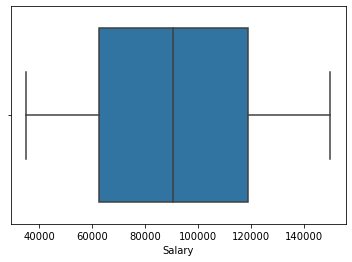

In [13]:
sns.boxplot(df['Salary'])

C:\Users\CS-L2-PC02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus %'>

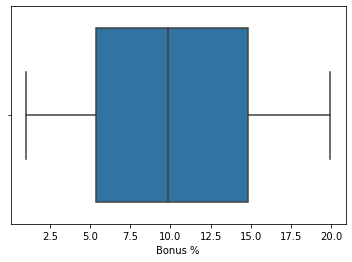

In [14]:
sns.boxplot(df['Bonus %'])

In [21]:
df.drop(['First Name','Last Login Time'],axis=1,inplace=True)

In [22]:
df

,Gender,Start Date,Salary,Bonus %,Senior Management,Team
0,Male,8/6/1993,97308,6.945,True,Marketing
1,Male,3/31/1996,61933,4.170,True,Marketing
2,Female,4/23/1993,130590,11.858,False,Finance
3,Male,3/4/2005,138705,9.340,True,Finance
4,Male,1/24/1998,101004,1.389,True,Client Services
...,...,...,...,...,...,...
995,Male,11/23/2014,132483,16.655,False,Distribution
996,Male,1/31/1984,42392,19.675,False,Finance
997,Male,5/20/2013,96914,1.421,False,Product
998,Male,4/20/2013,60500,11.985,False,Business Development


In [29]:
df['Team'].unique()

array(['Marketing', 'Finance', 'Client Services', 'Legal', 'Product',
       'Engineering', 'Business Development', 'Human Resources', 'Sales',
       'Distribution'], dtype=object)

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [30]:
transformer=ColumnTransformer(transformers=[
    ('t1',OneHotEncoder(sparse=False,drop='first'),['Gender','Senior Management','Team']),
    ('t0',StandardScaler(),['Salary']),
    ('t2',MinMaxScaler(),['Bonus %'])
],remainder='passthrough')

In [33]:
df_new=transformer.fit_transform(df)
df_new.shape

(1000, 14)

In [34]:
df_new = pd.DataFrame(df_new, columns=['gender','Senior Management','team(Client Services)','team(Distribution)','team(Engineering)','team(Finance)','team(Human Resources)','team(Legal)','team(Marketing)','team(Product)','team(Sales)','Salary','Bonus %','Start Date'])

In [36]:
df_new

,gender,Senior Management,team(Client Services),team(Distribution),team(Engineering),team(Finance),team(Human Resources),team(Legal),team(Marketing),team(Product),team(Sales),Salary,Bonus %,Start Date
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.201956,0.313276,8/6/1993
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.873036,0.166675,3/31/1996
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.213345,0.572825,4/23/1993
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.459947,0.439801,3/4/2005
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.314272,0.019758,1/24/1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.27087,0.826245,11/23/2014
996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.466857,0.985789,1/31/1984
997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.189983,0.021449,5/20/2013
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.916582,0.579534,4/20/2013
